In [2]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.datasets import make_classification
import seaborn as sns

In [3]:
#Generate a random 2-class classification problem.
features,target = make_classification(n_samples=400,n_features=2, n_classes=2,n_redundant=0, random_state=42)

In [4]:
x1 = [x[0] for x in features]
x2 = [x[1] for x in features]


df = pd.DataFrame({
    'Feature 1':x1,
    'Feature 2': x2,
    'Quality': target
})

In [5]:
df.head()

,Feature 1,Feature 2,Quality
0,0.800646,1.142262,1
1,-1.611599,-0.410046,0
2,1.110764,-0.029211,1
3,-0.286785,-1.730777,0
4,-0.273271,3.089116,0


In [6]:
df.describe()

,Feature 1,Feature 2,Quality
count,400.000000,400.000000,400.00000
mean,-0.036005,-0.002954,0.49750
std,1.197364,1.344242,0.50062
min,-2.565100,-4.537888,0.00000
25%,-1.011206,-1.052310,0.00000
50%,-0.174645,0.232648,0.00000
75%,0.950644,1.038168,1.00000
max,3.057537,3.151617,1.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002260FF2D820>,
      dtype=object)

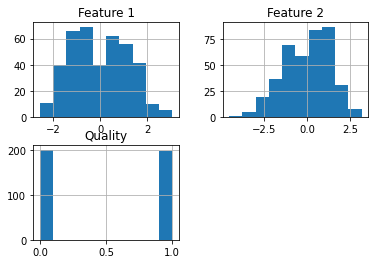

In [7]:
df.hist()

In [8]:
#Looking for correlations
df.corr()

,Feature 1,Feature 2,Quality
Feature 1,1.000000,-0.041727,0.824729
Feature 2,-0.041727,1.000000,-0.043751
Quality,0.824729,-0.043751,1.000000


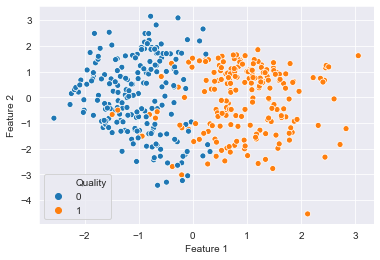

In [25]:
#data visualization
sns.set_style('darkgrid')
sns.scatterplot(data=df, x='Feature 1', y='Feature 2', hue='Quality')
#plt.title('Example of a problem suitable for Binary Classification')
plt.show()

In [26]:
#Spliting the data
xtrain, xtest, ytrain, ytest = train_test_split(features, target, train_size=0.8)

In [27]:
# SGDClassifier algorithm
model=SGDClassifier(loss='log',max_iter=1000, tol=0.01)

In [28]:
model.fit(xtrain,ytrain)

SGDClassifier(loss='log', tol=0.01)

In [29]:
model.score(xtest,ytest)

0.9625

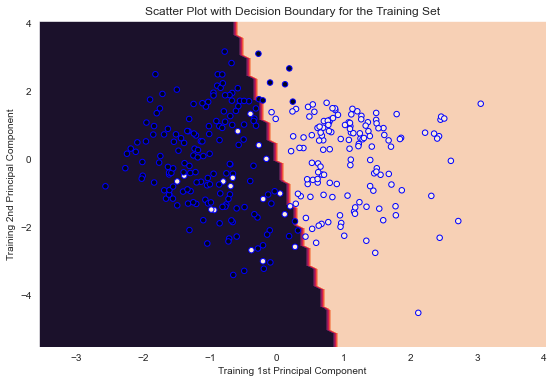

In [30]:
#Decision boundary of SGDClassifier algorithm
x_min, x_max = xtrain[:, 0].min() - 1, xtrain[:, 0].max() + 1
y_min, y_max = xtrain[:, 1].min() - 1, xtrain[:, 1].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

Z_train = model.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)

plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(xtrain[:, 0], xtrain[:, 1], c = ytrain, s = 30, edgecolor = 'blue')
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Training Set')

plt.show()

In [31]:
# confusion matrix SGDClassifier algorithm
from sklearn.metrics import confusion_matrix
y_pred = model.predict(xtest)
cm = confusion_matrix(ytest, y_pred)
cm

array([[39,  0],
       [ 3, 38]], dtype=int64)

Text(43.0, 0.5, 'Truth')

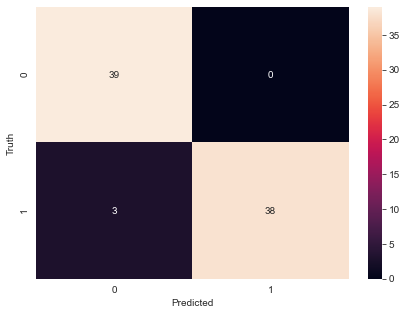

In [32]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

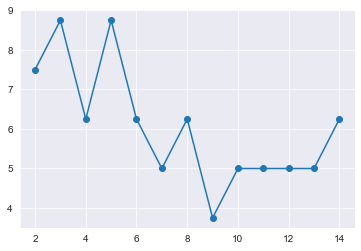

In [33]:
#KNN Algorithm
# Looking for the best k for knn algorithm
from sklearn import neighbors
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(2,15), errors, 'o-')
plt.show()


In [34]:
# Knn algorithm
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=9)
knn.fit(xtrain, ytrain)
y_pred_knn=knn.predict(xtest)
knn.score(xtest,ytest)

0.9625

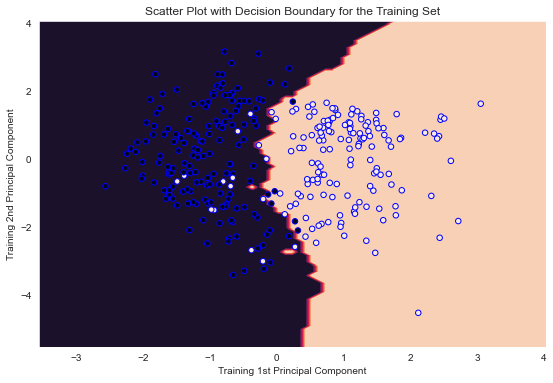

In [35]:
#Decision boundary of KNN algorithm
x_min, x_max = xtrain[:, 0].min() - 1, xtrain[:, 0].max() + 1
y_min, y_max = xtrain[:, 1].min() - 1, xtrain[:, 1].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

Z_train = knn.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)

plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(xtrain[:, 0], xtrain[:, 1], c = ytrain, s = 30, edgecolor = 'blue')
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Training Set')

plt.show()

In [36]:
#SVC Algorithm
from sklearn import svm
classifier = svm.SVC(kernel='rbf', gamma=0.01)
classifier.fit(xtrain,ytrain)
y_pred_svc=classifier.predict(xtest)
classifier.score(xtest,ytest)

0.9875

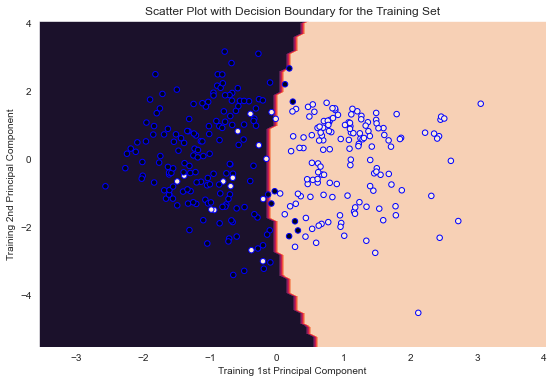

In [37]:
#Decision boundary of SVC algorithm
x_min, x_max = xtrain[:, 0].min() - 1, xtrain[:, 0].max() + 1
y_min, y_max = xtrain[:, 1].min() - 1, xtrain[:, 1].max() + 1

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                 np.arange(y_min, y_max, 0.1))

Z_train = classifier.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)

plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(xtrain[:, 0], xtrain[:, 1], c = ytrain, s = 30, edgecolor = 'blue')
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Training Set')

plt.show()

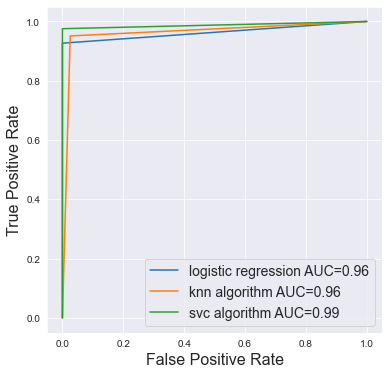

In [41]:
# Roc curve for the tree algorithms
from sklearn import metrics
#SGDClassifer algorithm
fpr, tpr, thr = metrics.roc_curve(ytest, y_pred)
auc = metrics.auc(fpr, tpr)
fig = plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr,label='logistic regression AUC=%.2f' % auc)
#Knn algorithm
fpr, tpr, thr = metrics.roc_curve(ytest, y_pred_knn)
auc_knn = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label='knn algorithm AUC=%.2f' % auc_knn)


#SVC Algorithm
fpr, tpr, thr = metrics.roc_curve(ytest, y_pred_svc)
auc_svc = metrics.auc(fpr, tpr)
plt.plot(fpr,tpr,label='svc algorithm AUC=%.2f' % auc_svc)

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

plt.legend(loc="lower right", fontsize=14)

plt.show()